# ROC curve

Receiver operating characteristic (ROC) curves are a useful tool when it comes to assessing the performance of a molecular docking routine. They can be used to display the abilities of a binary classifier at varying thresholds. ROC curves are created by plotting the true positive rate (TPR) against the false positive rate (FPR).

Since it is important to understand how ROC are constructed, first print and fill out the `ROC_pen_and_paper.pdf` document. Once all task on the document are completed, return to this notebook.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

results = pd.read_csv('results.csv')

## Data distribution

In order to visualize the distribution of our dataset, we create a histogram using seaborn.

<Axes: xlabel='value', ylabel='Count'>

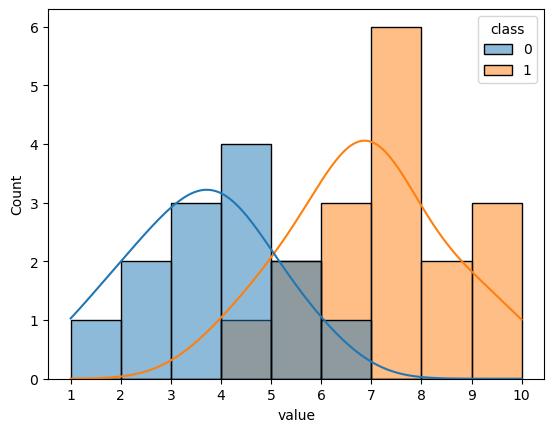

In [2]:
plt.xticks(np.arange(0,11))    # Show all numbers from 0 to 10

sns.histplot(data=results,     # Define the data from a pandas dataframe
             x='value',        # Define what should be shown in x axes
             hue='class',      # Use the classes for coloring
             binwidth=1,       # Define the width of the bin
             kde=True)         # Fit a distribution

## Metric defintions

In order to calculate ROC curves, we first need to be able to calculate the TPR and FPR. 

**Question 1:** Using the following equations, complete the two functions `TPR()` and `FPR()`.

$TPR = {TP \over TP + FN}$

$FPR = {FP \over FP + TN}$

where $TP$ are the true positives, $FN$ the false negatives, $FP$ the false positives, and $TN$ the true negatives.


In [3]:
def TPR(m):
    # Calculate and return the true positive rate (TPR)
    return m[1][1] / (m[1][1] + m[0][1])


def FPR(m):
    # Calculate and return the false positive rate (FPR)
    return 1 - m[0][0] / (m[0][0] + m[1][0])

Next, we calculate the TPR and FPR for 10 thresholds ranging from 0 to 9.

In [1]:
results['y_true'] = results['class']

# Define thresholds
thresholds = range(0,11)

# Initialize lists to store the TPRs and FPRs
fprs = []
tprs = []

# Iterate over the thresholds and calculate TPR and FPR
for t in thresholds:
    
    # Get the prediction for the current threshold
    results['y_pred'] = results['value'] > t

    # Calculate a confusion matrix using the prediction and the true labels
    matrix = confusion_matrix(results.y_pred, results.y_true)
    
    # Use the confusion matrix to calculate TPR and FPR
    fpr = FPR(matrix)
    tpr = TPR(matrix)

    # Store and print the values
    fprs.append(fpr)
    tprs.append(tpr)

    print(f"{t}: {fpr:.2f} {tpr:.2f}")
    #print(matrix)

NameError: name 'results' is not defined

Now, let's plot the calculated values.

<Axes: xlabel='False positive rate (FPR)', ylabel='True positive rate (TPR)'>

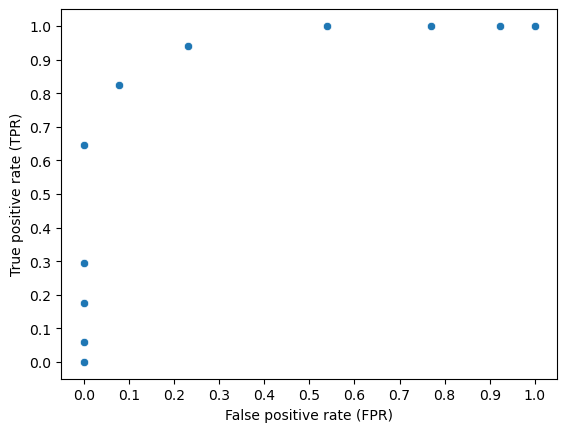

In [5]:
plt.xticks(np.arange(0,1.1, 0.1))
plt.yticks(np.arange(0,1.1, 0.1))

plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.savefig("positive.png", dpi=600)
sns.scatterplot(x=fprs, 
                y=tprs)

## Automatic method using sklearn

The python module `sklearn` provides a quick and easy method to calculate ROC curves and the area under the curve (AUC).

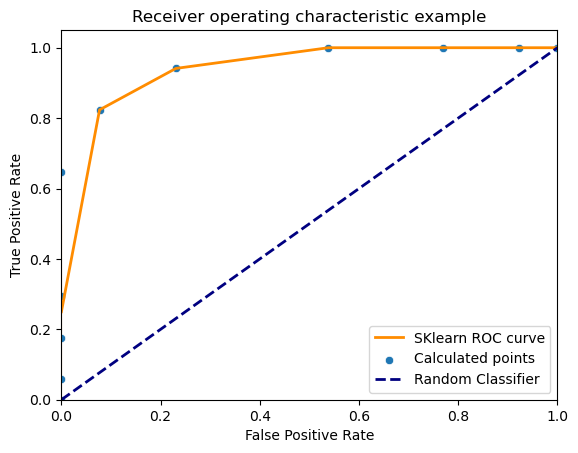

In [6]:
# Import the necessary modules
from sklearn.metrics import roc_curve, auc

# Calculate the metrics
(fpr, tpr, thresholds) = roc_curve(results['class'], results.value)

# Plot the TPR against the FPR

lw=2
sns.lineplot(x=fpr,
            y=tpr,
            color="darkorange",
            lw=2,
            label='SKlearn ROC curve')

# Add the previously calculated points for comparison
sns.scatterplot(x=fprs, 
                y=tprs,
                label='Calculated points')

# Plot a diagonal line from [0, 0] to [1, 1]
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--", label='Random Classifier')

# Define limits of axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Add title and axis names
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend()

As can be seen, the previously calculated points all lie on the ROC curve calculated by sklearn. This confirms the correct calculation.